In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

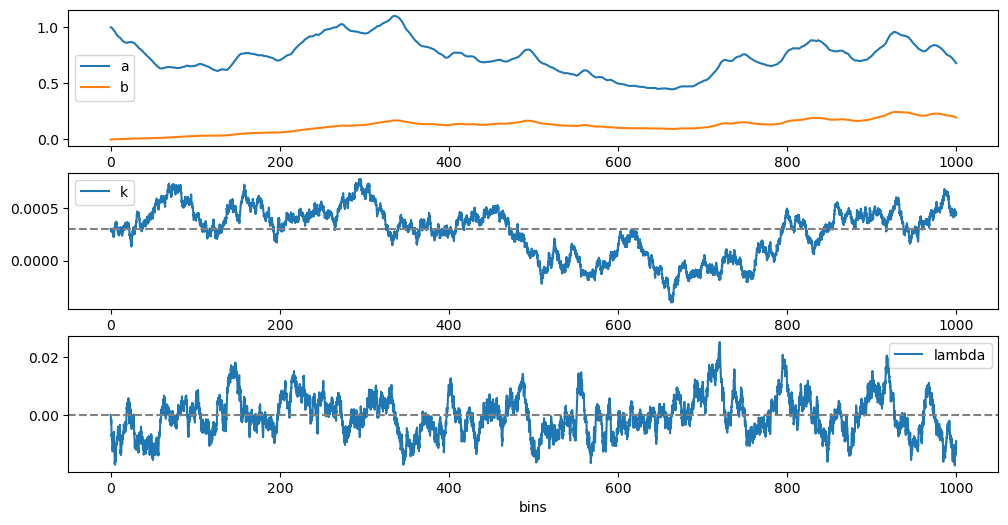

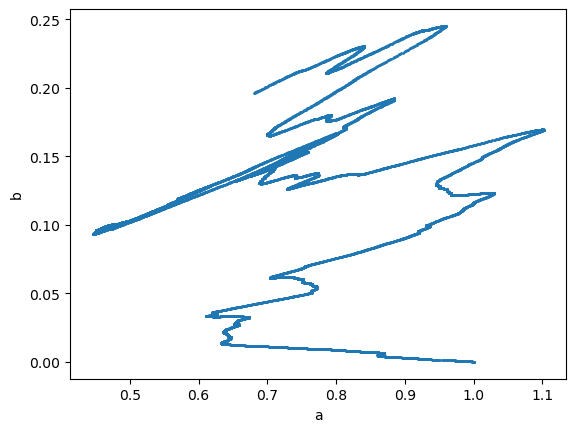

sd of lambda: 0.006845 compared to sig_lambda: 0.006931


In [299]:
# Parameters for the simulations, let's think of bins of 100bp for the genome (t_span is the number of such bins)
# transcription rate v is 30bp/s, so 0.3 bins/s
# k = omega  / v, with omega = 2*pi / 24h, so k = 2*pi / 24h * 3.3 = 2*pi / (24*60*60) * 3.3 = 2.4 * 10^-4 ~ 0.0003 rad / bins
k_mu = 0.0003 # assume positive velocity

# set the scales for k and lambda
gamma_k = 0.01 # 1 in 100 bins = 10kb, the angular velocity cannot change too fast
gamma_lam = 0.1 # 1 in 10 bins = 1kb # make it soft, if too rigid, the system will be very unstable because lambda can stay positive for a long time 

sig_k = k_mu # assume that the noise is of the same order of magnitude as the signal
eps_k = sig_k * np.sqrt(2*gamma_k)

sig_lambda = np.log(2)/100 # allow for about 2 fold in 100 bins = 10kb
eps_lambda = sig_lambda * np.sqrt(2*gamma_lam)

# Time span and evaluation points
t_span = (0, 1000) # 100 bins of 100bp = 10kb
dt = 0.1
t_eval = np.arange(t_span[0], t_span[1], dt)

# Initialize arrays for solution
a = np.zeros(len(t_eval))
b = np.zeros(len(t_eval))
k = np.zeros(len(t_eval))
lam = np.zeros(len(t_eval))

# Set initial conditions
# let's start with a 2x amplitude (assuming the signal is in log2)
a[0] = 1.0
b[0] = 0.0

k[0] = k_mu
lam[0] = 0

# Solve the system using Euler-Maruyama method
for i in range(1, len(t_eval)):
    t = t_eval[i]
    dt = t_eval[i] - t_eval[i-1]
    
    da = lam[i-1] * a[i-1] - k[i-1] * b[i-1]
    db = lam[i-1] * b[i-1] + k[i-1] * a[i-1]
    dk = gamma_k * (k_mu - k[i-1])
    dlam = -gamma_lam * lam[i-1]

    a[i] = a[i-1] + da * dt
    b[i] = b[i-1] + db * dt
    k[i] = k[i-1] + dk * dt + eps_k * np.random.normal(0, 1) * np.sqrt(dt)
    lam[i] = lam[i-1] + dlam * dt + eps_lambda * np.random.normal(0, 1) * np.sqrt(dt)

# Plot the results
plt.figure(figsize=(12, 6))
#make 2 subplots
plt.subplot(3,1,1)
plt.plot(t_eval, a, label='a')
plt.plot(t_eval, b, label='b')
plt.legend()
plt.xlabel('bins')
#plot k and lambda in the second subplot
plt.subplot(3,1,2)
plt.plot(t_eval, k, label='k')
#add horizontal line for k_mu
plt.axhline(y=k_mu, color='gray', linestyle='--')
plt.legend()
plt.subplot(3,1,3)

plt.plot(t_eval, lam, label='lambda')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.xlabel('bins')
#plot just b vs a in a separate plot
plt.figure()
plt.scatter(a,b, s=1)
plt.xlabel('a')
plt.ylabel('b')
plt.show()
print(f"sd of lambda: {np.std(lam):.6f} compared to sig_lambda: {sig_lambda:.6f}")